In [2]:
!pip install wordcloud

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional WordCloud
try:
    from wordcloud import WordCloud
    wordcloud_available = True
except ModuleNotFoundError:
    wordcloud_available = False

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("coolwarm")

In [8]:
df = pd.read_csv("netflix_titles.csv")
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Fill missing values safely (all columns with missing data)
df = df.assign(
    director=df['director'].fillna('Unknown'),
    cast=df['cast'].fillna('Unknown'),
    country=df['country'].fillna('Unknown'),
    rating=df['rating'].fillna('Unknown'),
    duration=df['duration'].fillna('Unknown'),
    date_added=df['date_added'].fillna(df['date_added'].mode()[0])
)

# Convert date_added to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Fill any NaT with mode
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

# Create year and month columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  month_added   8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 929.0+ KB


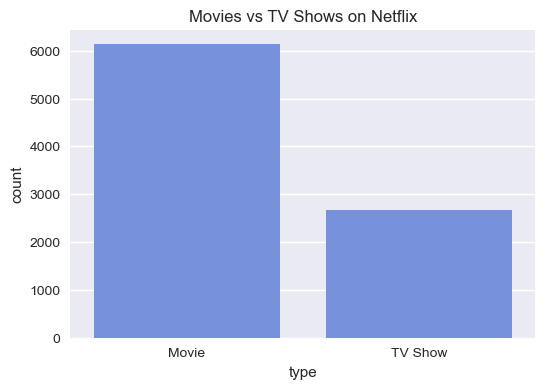

In [11]:
# Type distribution (Movies vs TV Shows)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_13472\1301299147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


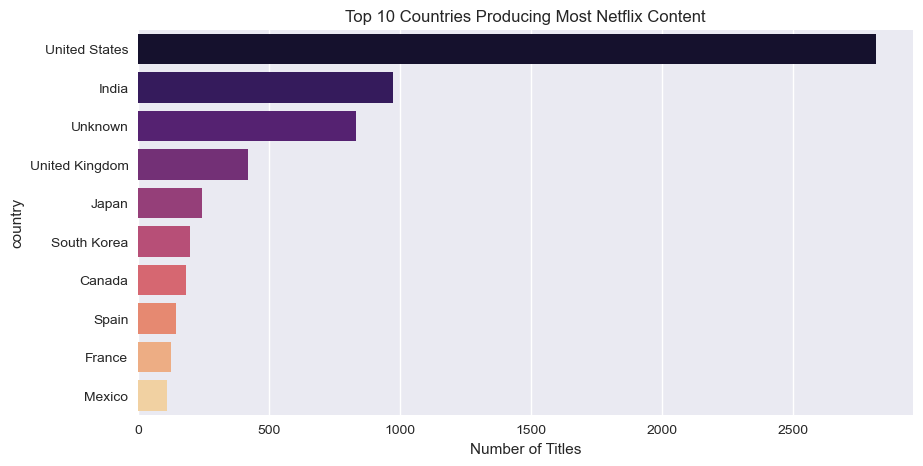

In [12]:
# Top 10 countries by content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries Producing Most Netflix Content")
plt.xlabel("Number of Titles")
plt.show()

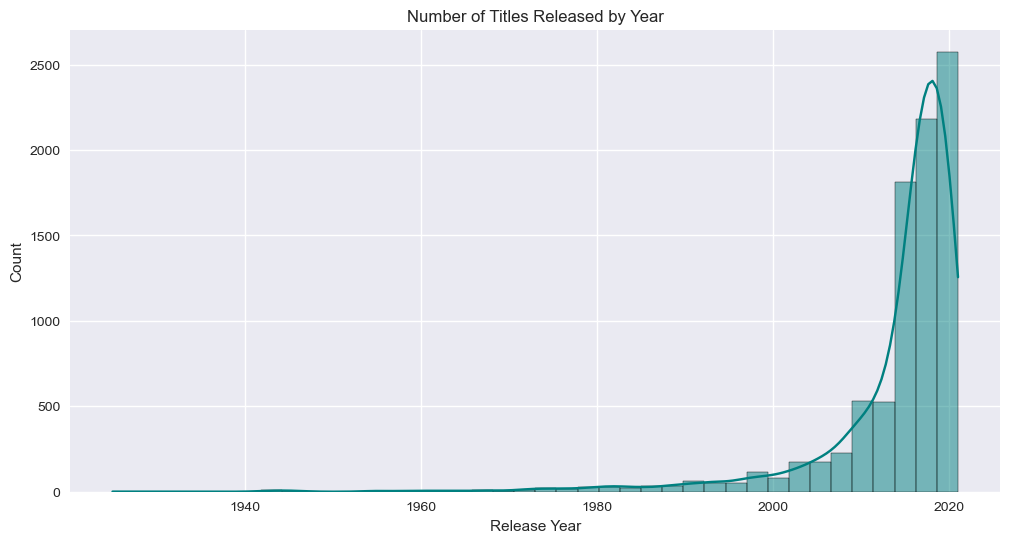

In [13]:

# Release year trend
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=40, kde=True, color='teal')
plt.title("Number of Titles Released by Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_13472\2011530069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


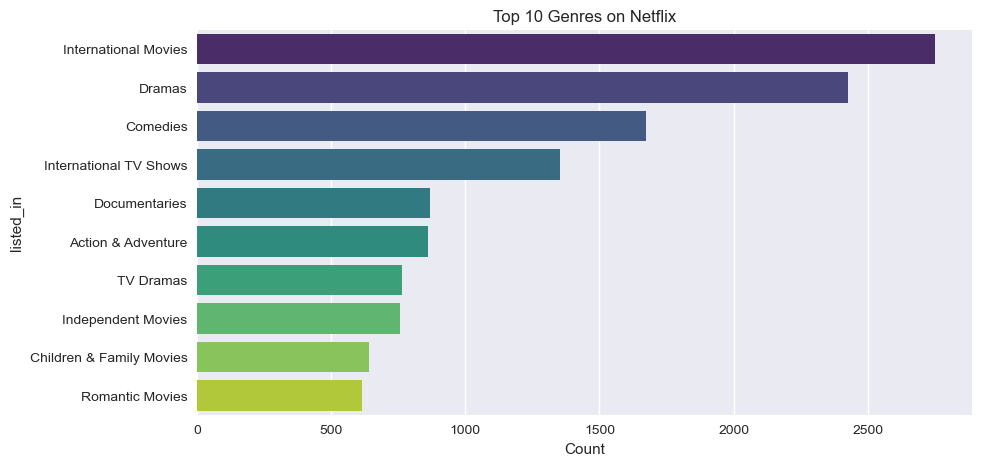

In [14]:
# Top genres
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_13472\799056901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')


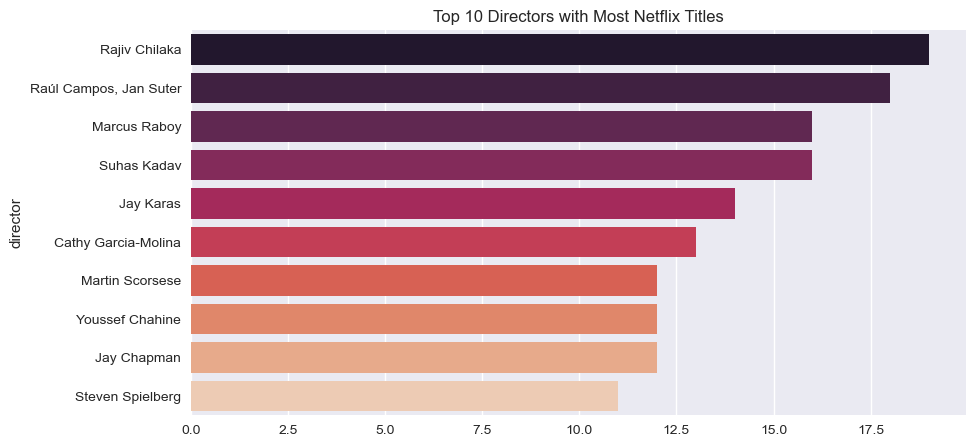

In [15]:
# Top directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')
plt.title("Top 10 Directors with Most Netflix Titles")
plt.show()

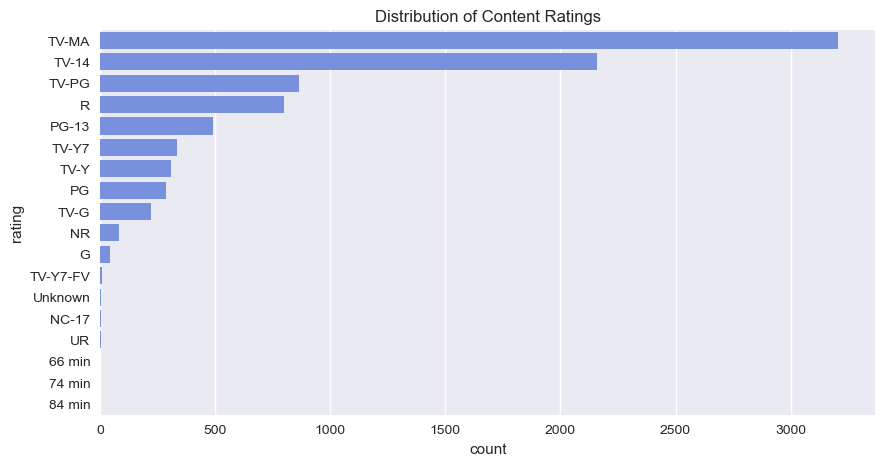

In [16]:
# Rating distribution
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

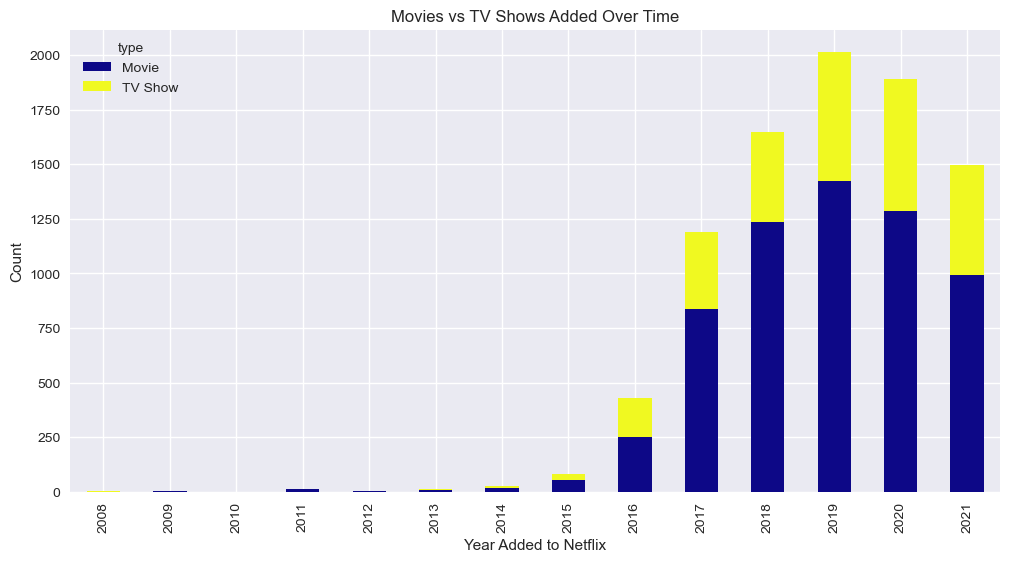

In [17]:
# Movies vs TV Shows over time
trend = df.groupby(['year_added', 'type']).size().unstack()
trend.plot(kind='bar', stacked=True, figsize=(12,6), colormap='plasma')
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Count")
plt.show()